<a href="https://colab.research.google.com/github/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/blob/main/FinalProject_6MWTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Walking is mediated through a finely balanced and carefully coordinated interplay of the musculoskeletal and nervous system [1, 2]. Damage to the brain and, especially, the spinal cord can impair walking function, a frequent and relevant symptom in neurological diseases or conditions such as multiple sclerosis (MS) [3] or traumatic spinal cord injury (SCI) [4]. MS is a chronic, autoimmune, inflammatory disease of the central nervous system (CNS). The
spinal cord is a common site of inflammatory destruction in MS with frequent involvement of the long descending and ascending fibre tracts [5, 6]. Three quarters of people with MS report reduced mobility throughout their lifetime [7]. Spinal cord damage can be caused by inflammation as in multiple sclerosis (MS) or may result from trauma (traumatic SCI) or ischemia (ischemic SCI) [8, 9]. About half of all lesions in SCI are functionally incomplete with some motor or sensory function preserved below the level of the injury which may allow for some recovery of walking function [8, 10]. Regaining walking ability is thus a priority for subjects with spinal disorders and a main goal in the field of neurorehabilitation [11, 12].

After spinal cord damage, gait disturbances are heterogeneous with different aspects of ambulatory function being affected to varying degrees [13, 14] including muscle strength, coordination and balance. Recovery of locomotor function after CNS damage is enhanced by training [3, 15–19]. In clinical practice, therapy of walking dysfunction is usually adapted to the individual capabilities at the beginning and throughout the course of therapy, requiring valid and repeated evaluations by experienced therapists. Visual inspection of gait and various scoring systems (e.g., Expanded Disability Status Scale (EDSS), Walking Index for Spinal Cord Injury (WISCI)) and clinical walking tests (e.g., timed walking tests assessing maximal speed and endurance, balance scores) are frequently used as readouts of ambulatory function in MS [20–23] and SCI [24, 25]. However, these measures provide only limited information about specific gait deficits, are generally insensitive to change, and may be affected by subjectivity [21, 26, 27]. On the other hand, these measures seem to be clinically meaningful and valid as they measure function closely related to everyday tasks [21, 26]. Clinical scores and walking tests, such as the endurance six-minute walk test (6MWT), are thus frequently used as primary endpoints in clinical interventional trials [28].

Three-dimensional (3D) full-body kinematic movement analysis, a more recent technique, provides objective and quantitative measures. This technique is able to unravel the individual factors underlying a given patient’s gait dysfunction, even in complex neurological conditions such as MS [21, 29–31] or SCI [4, 32, 33]. 3D gait analysis permits the cataloguing and processing of numerous kinematic parameters (e.g., spatiotemporal data, joint angles etc.)
[21, 32]. Today, it represents the gold standard in assessing locomotor dysfunction in humans [21]. Such techniques are informative concerning how exactly patients move and provide more in-depth insights into complex walking dysfunctions. However, among these many kinematic parameters, there is no evidence to date as to which are the most revealing for daily walking, or more precisely, for the endurance test (6MWT).

In this project, a better understanding of the gait parameters important for the outcome of the 6MWT, a test measuring walking distance after six minutes that is closely related to daily walking, will be investigated. In this way, therapies aimed at restoring walking function in MS and SCI patients could be better tailored.


# Methods
71 patients from Balgrist with MS or SCI will be retrospectively included in the study. All patients underwent 3D motion analysis where they walked for 30 seconds on a treadmill (120 Hz, FDM-T, Zebris Medical GmbH, Germany). The gait was laboratory equipped with 27 infrared cameras recording via Nexus (Vicon, Oxford, UK) motion capture software at a sampling rate of 200 Hz. Twenty-nine reflective markers (14 mm diameter) were placed on the skin based on the full-body gait model (Plug-in-Gait, Vicon, UK). All patients walked on the treadmill at a fixed speed of 2.5 km/h. Data were processed using
Vicon Nexus motion capture software (Vicon, Oxford, UK) and the gait parameters were extracted using an in-house made MATLAB algorithm (2020b, The Mathworks Inc. Natick, Massachusetts, United States). A set of 38 gait parameters, such as range of motion at different joints, stability, leg coordination, symmetry, end-point measures, gait phases and variability [34], were calculated for each patient. Bilateral gait parameters were distinguished between the more impaired (MI) leg and the less impaired (LI) leg, instead of left and right.
Impairments in each leg were assessed by a physician during a neurological examination. For each gait parameter, the mean for each step cycle and then the mean of all the steps were calculated for each patient. In addition, patients performed the 6MWT.

In order to characterise which gait parameters are the most important in the 6MWT outcome, a prediction analysis will be conducted. The analysis will be performed in Python 3 (Python Software Foundation. Python Language Reference, version 3.8. Available at http://www.python.org). Using the python package scikit-learn, supervised machine learning, more specifically linear regression and classification, such as logistic regression and support vector machine (SVM), will be implemented. In order to identify how many classes are necessary for the prediction of the 6MWT with SVM, k-nearest neighbours (kNN) will be used. In addition, feature selection, more specifically sequential feature selection using the python package mlxtend, will be implemented to find the best set of gait parameters predicting the 6MWT. Finally, an evaluation of the predictions of each algorithm will be analysed in terms of root mean square errors (RMSE) for regression and confusion matrix for classification.

# Pauline

# Datasets

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Demographics

In [4]:
demographics = pd.read_csv('https://raw.githubusercontent.com/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Demographics.csv?token=ARS7BP6TMLPR42XW5QE6JPTBTS4HU')
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L
1,2,M,30,SCI,7.0,NaN,T11,D,580,R
2,3,M,73,SCI,189.0,NaN,C7,D,660,L
3,4,M,43,SCI,165.0,NaN,C4,D,435,L
4,5,M,41,SCI,150.0,NaN,C7,D,683,R


In [6]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         71 non-null     int64  
 1   Gender            71 non-null     object 
 2   Age               71 non-null     int64  
 3   Pathology         71 non-null     object 
 4   Disease_duration  70 non-null     float64
 5   EDSS              39 non-null     float64
 6   Lesion_Level      32 non-null     object 
 7   AISA              32 non-null     object 
 8   6MWT              71 non-null     int64  
 9   MI_Leg            71 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.7+ KB


### Gait parameters

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/paulinerosegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/GaitParameters_MeanValues.csv?token=ARS7BP647XGAMVID73GLAFTBTS4KY')
df.head()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.735770,36.034530,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.022550,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608
1,2,37.439614,69.169960,69.872639,113.192750,445.427896,411.142245,47.798526,24.677593,36.310316,35.028409,14.951478,18.227931,55.297972,45.591811,20.402975,20.150739,-0.384519,-6.038282,163.916030,39.272235,24.458508,4.456110,17.400092,10.894105,50.917693,2.020207,1.366663,4.226179,2.286283,0.970886,0.976266,0.935097,0.954622,0.045577,0.043309,0.255861,0.071024,580
2,3,38.578972,70.270891,69.788797,98.529591,480.244244,453.768167,16.184813,23.731106,40.643418,35.302048,8.062037,7.108703,39.130164,24.811085,18.743314,24.410080,-3.116071,-11.106234,198.529211,59.172352,27.583166,13.060106,36.419205,22.860943,49.939540,3.285648,3.978193,4.014319,4.701067,0.969292,0.985264,0.954472,0.950329,0.027551,0.034217,0.122458,0.070346,660
3,4,38.978015,69.815805,70.647653,120.233731,440.851850,422.273628,27.509750,32.613873,33.884592,34.719273,8.247178,10.649617,33.199151,48.882775,20.658857,19.807507,-3.274720,-15.361361,225.328160,54.830990,29.374773,5.315396,31.926865,11.785816,51.810222,1.845620,2.717135,2.657878,3.207750,0.977331,0.974214,0.950128,0.959368,0.068034,0.080128,0.175179,0.103513,435
4,5,38.909091,69.979798,70.303030,62.236637,425.175593,420.913803,23.223134,25.383125,32.135633,32.089734,9.092947,7.989464,53.502745,55.649666,22.757721,29.166064,-0.893139,0.870194,166.756233,36.316662,21.730780,3.754159,4.257673,21.511553,49.496731,2.288559,2.089971,2.350893,2.046244,0.982626,0.988945,0.964738,0.982626,0.035682,0.030656,0.377876,0.079762,683


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  71 non-null     int64  
 1   DoubleLimbSupport          71 non-null     float64
 2   MI_Stance                  71 non-null     float64
 3   LI_Stance                  71 non-null     float64
 4   StepWidth                  71 non-null     float64
 5   MI_StepLength              71 non-null     float64
 6   LI_StepLength              71 non-null     float64
 7   MI_ToeHeight               71 non-null     float64
 8   LI_ToeHeight               71 non-null     float64
 9   MI_HipFlexion_Extension    71 non-null     float64
 10  LI_HipFlexion_Extension    71 non-null     float64
 11  MI_HipAbduction_Adduction  71 non-null     float64
 12  LI_HipAbduction_Adduction  71 non-null     float64
 13  MI_KneeFlexion_Extension   71 non-null     float64
 

In [10]:
df.describe()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,36.000000,38.670674,69.207431,70.890831,128.141952,428.559623,413.267816,25.669494,26.156560,36.261823,38.733822,9.719733,9.977813,42.453426,46.905200,23.172610,27.201306,0.154338,-3.126009,214.067334,49.979401,32.366295,11.280767,22.743480,24.301930,49.777952,3.412371,2.878812,4.756610,4.166358,0.957404,0.973574,0.922246,0.936674,0.055576,0.056325,0.212828,0.089741,482.338028
std,20.639767,2.845055,2.200124,1.639531,42.274082,51.347497,53.174902,11.576406,10.034006,5.988194,5.616207,2.995576,2.909923,13.889039,11.766448,9.516568,13.277136,4.118837,8.980472,61.834949,14.957141,11.134593,9.888739,18.667395,14.105219,3.127885,1.689176,1.148371,2.155543,1.856664,0.040118,0.012754,0.053022,0.038580,0.023094,0.020388,0.205449,0.024700,114.369819
min,1.000000,30.610452,62.892079,67.935768,26.297509,297.112137,302.497942,7.331035,-22.324992,22.483565,29.260143,3.805951,4.523357,13.517853,11.132290,11.701314,12.386806,-9.322600,-21.396708,109.992634,25.197813,14.667634,2.994966,2.770041,6.364573,38.984306,0.914553,0.959185,2.022550,1.263138,0.765258,0.927676,0.711280,0.792681,0.025409,0.020163,0.063025,0.041008,213.000000
25%,18.500000,37.293571,68.288440,69.890023,103.596464,400.920225,376.306348,17.639732,21.694503,32.689287,35.623320,8.107850,7.986064,31.690820,40.264608,17.342436,20.343394,-2.697719,-8.954118,168.082235,38.647774,25.345833,5.383885,7.809788,13.152751,48.682990,2.156985,2.041673,3.235199,2.900508,0.956213,0.968982,0.904172,0.926034,0.038020,0.041570,0.126888,0.070187,405.000000
50%,36.000000,38.909091,69.696970,70.562771,127.964916,425.679220,409.894013,23.687495,26.732227,36.307242,37.846334,9.396934,9.640367,43.220008,49.273306,20.658857,23.455451,-0.308172,-2.933410,205.083427,47.709683,29.786343,7.686148,14.276303,20.893574,49.542661,3.046760,2.780643,4.134200,3.960648,0.971279,0.975856,0.934301,0.945753,0.050449,0.051855,0.163559,0.090471,474.000000
75%,53.500000,40.533366,70.485044,71.837422,150.261316,460.621021,447.999618,30.809345,29.806623,39.740237,40.601421,11.229954,11.331103,54.152209,55.144777,26.323950,30.705735,2.732839,2.480146,235.351191,58.433613,36.467336,13.282215,35.925427,31.341058,51.007897,4.104562,3.412531,5.796713,5.248047,0.978783,0.982278,0.956635,0.959583,0.065936,0.071929,0.235386,0.103346,580.000000
max,71.000000,45.727546,73.693456,76.262626,246.147689,562.426223,536.674484,75.188851,48.715432,56.234794,57.003163,19.080865,18.227931,74.401158,64.127072,72.264476,96.303639,7.941819,23.525453,453.240959,93.396725,69.630148,49.286937,67.914517,59.553515,57.474821,7.253001,7.156958,10.122751,9.584818,0.992296,0.993904,0.979680,0.987868,0.161571,0.107153,1.747591,0.157097,711.000000


# Data visualization

In [11]:
demographics.head(1)

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L


Let's have a look at different boxplots describing the population distribution with respect to the 6MWT.

Text(0.5, 1.0, 'Six-minute walk test across gender')

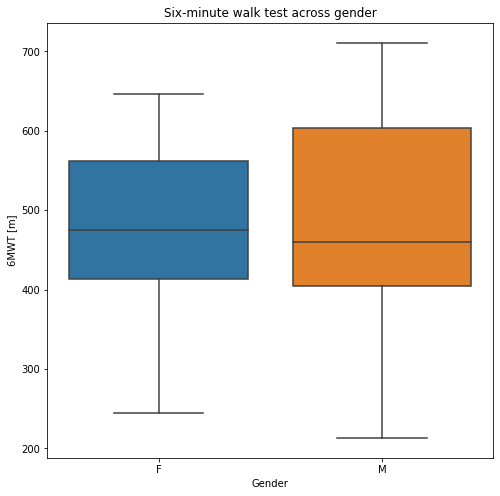

In [12]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across gender')

In [13]:
demographics['Pathology'].value_counts()

MS     39
SCI    32
Name: Pathology, dtype: int64

Text(0.5, 1.0, 'Six-minute walk test across pathology')

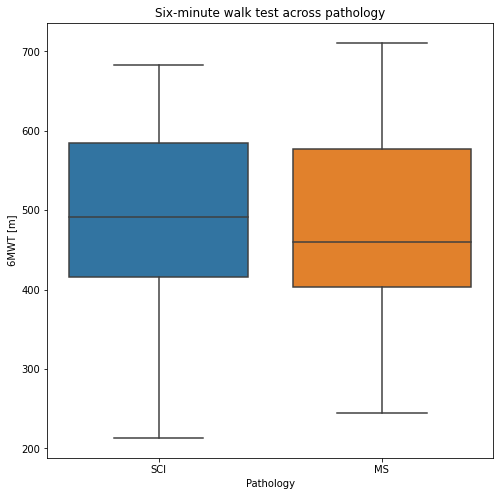

In [14]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Pathology", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across pathology')

Text(0.5, 1.0, 'Six-minute walk test across SCI patients')

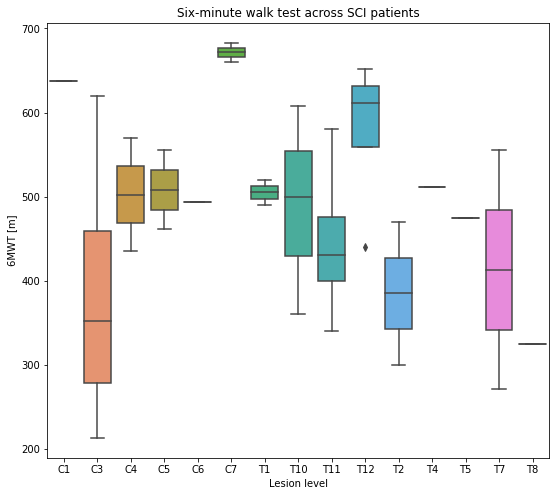

In [26]:
mydem = demographics.sort_values(by = ['Lesion_Level'], ascending = True)
plt.figure(figsize = (9,8))
sns.boxplot(x = "Lesion_Level", y = '6MWT', data = mydem)
plt.xlabel('Lesion level')
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across SCI patients')

Let's see how the pathology is distributed along gender and age.

Text(0.5, 1.0, 'MS and SCI distributions across gender')

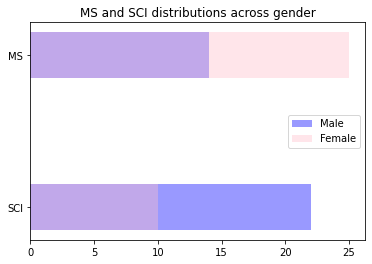

In [17]:
female = demographics['Gender'] == 'F'
female_counts = demographics[female]['Pathology'].value_counts()
male = demographics['Gender'] == 'M'
male_counts = demographics[male]['Pathology'].value_counts()

width=0.3
plt.barh(male_counts.index, male_counts.values, width, alpha=0.4, color = 'blue', label = 'Male')
plt.barh(female_counts.index, female_counts.values, width, alpha=0.4, color ='pink', label = 'Female')
plt.legend()
plt.title('MS and SCI distributions across gender')

From the bar plot we see that in population there are more men with SCI than women. 

Text(0.5, 1.0, 'Age distribution in SCI patients')

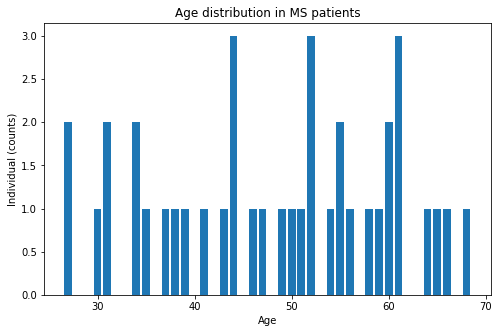

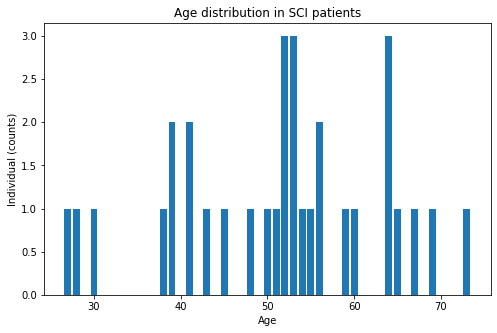

In [32]:
MS  = demographics['Pathology'] == 'MS'
MS_coutns = demographics[MS]['Age '].value_counts()

SCI  = demographics['Pathology'] == 'SCI'
SCI_coutns = demographics[SCI]['Age '].value_counts()

plt.figure(figsize = (8,5))
plt.bar(MS_coutns.index, MS_coutns.values)
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS patients')

plt.figure(figsize = (8,5))
plt.bar(SCI_coutns.index, SCI_coutns.values)
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI patients')

# Statistical analysis

In [264]:
from scipy import stats

We would like to know if there is a significant difference between women in men in the 6MWT outcome.

In [265]:
females = demographics[demographics['Gender'] == 'F']['6MWT']
males = demographics[demographics['Gender'] == 'M']['6MWT']
stats.ttest_ind(females, males)

Ttest_indResult(statistic=-0.509592914855578, pvalue=0.611962730278609)

There is no significant difference between males and females in the 6MWT outcome.

# Correlation analysis

We would like to see which gait parameters are correlated with the 6MWT.

In [174]:
df.head(1)

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.73577,36.03453,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.02255,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608


Let's see if we have empty values

In [240]:
df.isna().sum()

PatientID                    0
DoubleLimbSupport            0
MI_Stance                    0
LI_Stance                    0
StepWidth                    0
MI_StepLength                0
LI_StepLength                0
MI_ToeHeight                 0
LI_ToeHeight                 0
MI_HipFlexion_Extension      0
LI_HipFlexion_Extension      0
MI_HipAbduction_Adduction    0
LI_HipAbduction_Adduction    0
MI_KneeFlexion_Extension     0
LI_KneeFlexion_Extension     0
MI_AnkleFlexion_Extension    0
LI_AnkleFlexion_Extension    0
SpineLateral_Flexion         0
SpineFlexion_Extension       0
C7TrajectoryLength           0
COMML                        0
COMAP                        0
HipASI                       0
KneeASI                      0
AnkleASI                     0
LegPhaseDispersion           0
SSDMI_HipMI_Knee             0
SSDLI_HipLI_Knee             0
SSDMI_KneeMI_Ankle           0
SSDLI_KneeLI_Ankle           0
ACCMI_HipMI_Knee             0
ACCLI_HipLI_Knee             0
ACCMI_Kn

We do not have empty values.

Let's have a look at the correlation matrix.

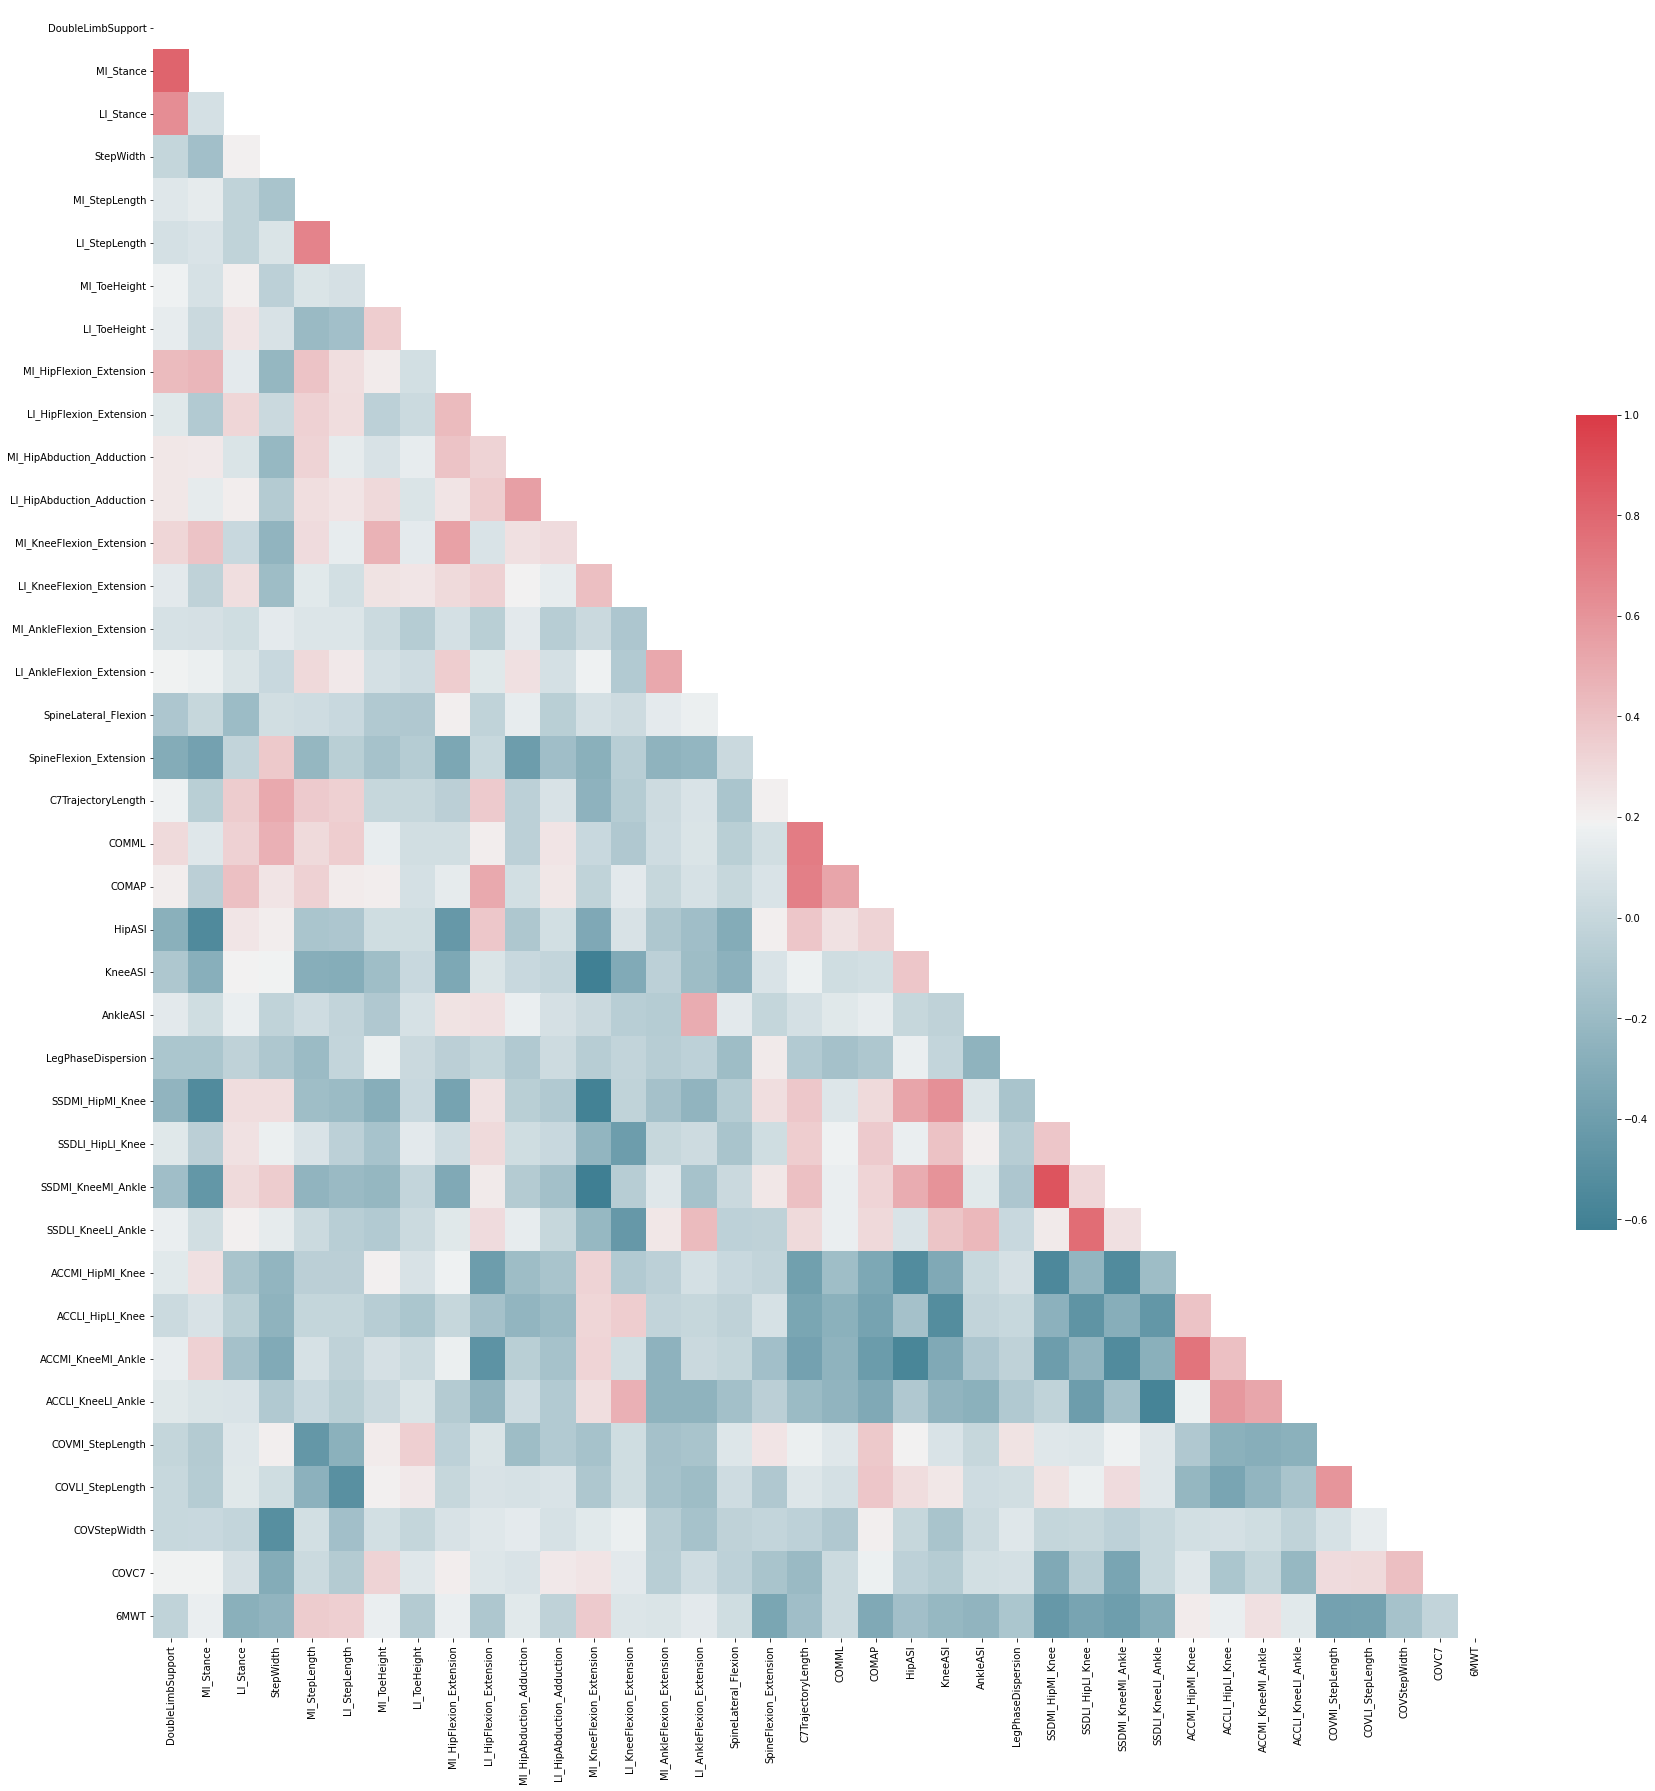

In [252]:
Data = df.drop(columns=['PatientID'])
#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

Let's have a look at the correlations with the 6MWT outocme that have a correlation coefficient higher than 0.5.

In [253]:
correlations = corr[abs(corr>.50)]['6MWT']
correlations = correlations[correlations.notna()]
correlations

6MWT    1.0
Name: 6MWT, dtype: float64

We see that there is no variable that are correlated with the 6MWT outcome. From this result we can conclude that a simple correlation analysis cannot explain what variables may explain the 6MWT. Therefore we need a more advanced analysis, machine learning.

# k-means clustering

We would like to identify clusters in our dataset by applying k-means clustering.

In [254]:
import sklearn as skl
from sklearn.cluster import KMeans

In [255]:
Data.head(1)

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.73577,36.03453,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.02255,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608


Since the range of the gait parameters are very different between each other, let's scale them between 0 and 1.

In [256]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [257]:
for col in Data.columns:
  Data[Data.columns] = scaler.fit_transform(Data[Data.columns])
Data.head()

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,0.658243,0.723518,0.401379,0.351884,0.652896,0.742089,0.297123,0.701236,0.451901,0.244183,0.516609,0.466245,0.601891,0.723885,0.271851,0.217473,0.591777,0.375346,0.104453,0.330396,0.058957,0.031921,0.000000,0.040033,0.577787,0.000000,0.038769,0.000000,0.036266,1.000000,1.000000,0.992296,1.000000,0.000000,0.000000,0.023699,0.217919,0.793173
1,0.451751,0.581211,0.232605,0.395248,0.559020,0.463942,0.596357,0.661632,0.409667,0.207918,0.729662,1.000000,0.686233,0.650244,0.143679,0.092519,0.517717,0.341890,0.157097,0.206373,0.178137,0.031564,0.224579,0.085159,0.645379,0.174436,0.065746,0.272046,0.122949,0.905697,0.733679,0.833895,0.829670,0.148117,0.266078,0.114472,0.258556,0.736948
2,0.527120,0.683136,0.222536,0.328551,0.690246,0.645967,0.130475,0.648308,0.538050,0.217781,0.278632,0.188648,0.420679,0.258116,0.116275,0.143276,0.359498,0.229073,0.257937,0.498168,0.234988,0.217427,0.516531,0.310147,0.592479,0.374081,0.487112,0.245891,0.413129,0.898678,0.869542,0.906082,0.807679,0.015731,0.161559,0.035281,0.252721,0.897590
3,0.553517,0.641004,0.325679,0.427274,0.541772,0.511476,0.297368,0.773347,0.337796,0.196775,0.290753,0.447023,0.323263,0.712343,0.147904,0.088429,0.350309,0.134351,0.336012,0.434511,0.267585,0.050126,0.447572,0.101924,0.693648,0.146892,0.283642,0.078434,0.233680,0.934085,0.702697,0.889897,0.853988,0.313046,0.689327,0.066577,0.538420,0.445783
4,0.548957,0.656187,0.284292,0.163471,0.482686,0.505669,0.234197,0.671563,0.285977,0.101993,0.346123,0.252916,0.656746,0.840033,0.182560,0.199951,0.488256,0.495677,0.165372,0.163036,0.128508,0.016400,0.022836,0.284777,0.568531,0.216773,0.182450,0.040535,0.094104,0.957410,0.925126,0.944330,0.973144,0.075445,0.120620,0.186904,0.333830,0.943775


In [258]:
X = Data.drop(columns=['6MWT'])
X.head()

,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7
0,0.658243,0.723518,0.401379,0.351884,0.652896,0.742089,0.297123,0.701236,0.451901,0.244183,0.516609,0.466245,0.601891,0.723885,0.271851,0.217473,0.591777,0.375346,0.104453,0.330396,0.058957,0.031921,0.000000,0.040033,0.577787,0.000000,0.038769,0.000000,0.036266,1.000000,1.000000,0.992296,1.000000,0.000000,0.000000,0.023699,0.217919
1,0.451751,0.581211,0.232605,0.395248,0.559020,0.463942,0.596357,0.661632,0.409667,0.207918,0.729662,1.000000,0.686233,0.650244,0.143679,0.092519,0.517717,0.341890,0.157097,0.206373,0.178137,0.031564,0.224579,0.085159,0.645379,0.174436,0.065746,0.272046,0.122949,0.905697,0.733679,0.833895,0.829670,0.148117,0.266078,0.114472,0.258556
2,0.527120,0.683136,0.222536,0.328551,0.690246,0.645967,0.130475,0.648308,0.538050,0.217781,0.278632,0.188648,0.420679,0.258116,0.116275,0.143276,0.359498,0.229073,0.257937,0.498168,0.234988,0.217427,0.516531,0.310147,0.592479,0.374081,0.487112,0.245891,0.413129,0.898678,0.869542,0.906082,0.807679,0.015731,0.161559,0.035281,0.252721
3,0.553517,0.641004,0.325679,0.427274,0.541772,0.511476,0.297368,0.773347,0.337796,0.196775,0.290753,0.447023,0.323263,0.712343,0.147904,0.088429,0.350309,0.134351,0.336012,0.434511,0.267585,0.050126,0.447572,0.101924,0.693648,0.146892,0.283642,0.078434,0.233680,0.934085,0.702697,0.889897,0.853988,0.313046,0.689327,0.066577,0.538420
4,0.548957,0.656187,0.284292,0.163471,0.482686,0.505669,0.234197,0.671563,0.285977,0.101993,0.346123,0.252916,0.656746,0.840033,0.182560,0.199951,0.488256,0.495677,0.165372,0.163036,0.128508,0.016400,0.022836,0.284777,0.568531,0.216773,0.182450,0.040535,0.094104,0.957410,0.925126,0.944330,0.973144,0.075445,0.120620,0.186904,0.333830


Let's have a look at the elbow plot to see how many clusters we should take.

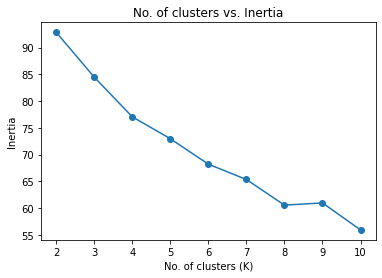

In [259]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart creates an "elbow" plot and we can pick the number of clusters beyond which the reduction in inertia decreases sharply. 

# Boqi